# 데이터 전처리(Data Preprocessing)

데이터 전처리는 ML 알고리즘만큼 중요하다.  
ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있다.(Garbage In, Garbage Out)  

결손값, 즉 NaN, Null 값은 허용되지 않으므로 고정된 다른 값으롤 변환해야 한다. 피처 값 중 Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대체할 수 있다. 하지만 Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 더 좋다. 가장 결정이 힘든 부분이 Null 값이 일정 수준 이상 되는 경우이다.  
정확히 몇 퍼센트까지를 일정 수준 이상이라고 판단하는 기준은 없지만 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 업무로직 등을 상세히 검토해 더 정밀한 대체값을 선정해야 한다.  

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다. 그래서 모든 문자열 값은 인코딩돼서 숫자형으로 변환해야 한다.  
문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 의미한다. 카테고리형 피처는 코드 값으로 표현하는 게 더 이해하기 쉽다.  
텍스트형 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제하는 게 좋다. 피처는 단순히 데이터 로우를 식별하는 용도로 사용되기 때문에 예측에 중요한 요소가 될 수 없으며 알고리즘을 오히려 복잡하게 만들고 예측 성능을 떨어뜨리기 때문이다.

## 데이터 인코딩

### 레이블 인코딩

레이블 인코딩(Label encoding) : 카테고리 피처를 코드형 숫자 값으로 변환하는 것

In [1]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


TV는 0, 냉장고는 1, 전자레인지는 4, 컴퓨터는 5, 선풍기는 3, 믹서는 2로 변환

In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [3]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩은 숫자 변환 값은 단순 코디이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안 된다. 이러한 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML 알고리즘에는 적용하지 않아야 한다. 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별문제가 없다.

### 원-핫 인코딩(One-Hot Encoding)

원-핫 인코딩(One Hot encoding) : 피처 값을 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식

* 원-핫 인코딩 주의할 점  

① 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다.  
② 입력 값으로 2차원 데이터가 필요하다.

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환
print('reshape 하기 전:', labels.shape)
labels = labels.reshape(-1, 1)
print('reshape 후:',labels.shape)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

reshape 하기 전: (8,)
reshape 후: (8, 1)
원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API 가 있다. => get_dummies()  
사이킷런의 OneHotEncoder 와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환할 수 있다.

In [5]:
import pandas as pd

df = pd.DataFrame({'items' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링과 정규화

피처 스케일링(feature scaling) : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업  

 - 표준화
 
 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미  
 (데이터값 - 평균) / 표준편차  
 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값으로, 이 방법을 적용하려는 때는 2개 이상의 대상이 단위가 다를 때 대상 데이터를 같은 기준으로 볼 수 있게 한다.
 
 
 
 - 정규화  
 
 일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념  
 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것  
 (데이터 값 - 최솟값) / (최댓값 - 최솟값)  
 전체 구간을 0~100으로 설정하여 데이터를 관찰하는 방법. 데이터 군 내에서 특정 데이터가 가지는 위치를 볼 때 사용

데이터 표준화를 통해 outlier 를 제거하고, 그 다음 정규화를 하여 상대적크기에 대한 영향력을 줄인 다음 분석을 시작한다.

사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있다. 사이킷런은 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미한다. 혼선을 방지하기 위해 일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통칭하고 선형대수 개념의 정규화를 벡터 정규화로 지칭하겠다.

## StandardScaler

In [6]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame 으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [7]:
# 표준화
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환. fit() 과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반한돼 이를 DataFrame 으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 컬럼 값이 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됐음을 알 수 있다.

## MinMaxScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 세트 변환. fit() 과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최대값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있다.

## 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

fit() 은 데이터 변환을 위한 기준 정보 설정을 적용하며 transform()은 이렇게 설정된 정보를 이용해 데이터를 변환한다.  
fit_transform() 은 fit() 과 transform() 을 한번에 적용하는 기능을 수행한다.  

Scaler 객체를 이용해 학습 데이터 세트로 fit() 과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다는 것이다. 즉 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [10]:
# 학습 데이터 세트 변환

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit() 하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1 로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scaled 된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scaled 된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [11]:
# 테스트 데이터 세트 변환

# MinMaxScaler에 test_array 를 fit() 하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5 -> 1 로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있다.  
테스트 데이터의 경우는 최솟값 0, 최댓값 5이므로 1/5로 스케일링된다.  
따라서 원본값 1은 0.2로, 원본값 5는 1로 변환이 된다. 앞서 학습 데이터는 스케일링 변환으로 원본값 2가 0.2로 변환됐고, 원본값 10 이 1로 변환됐다.  
이렇게 되면 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래한다.  
따라서 테스트 데이터에 다시 fit()을 적용해서는 안 되며 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 한다.

In [12]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scaled 된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 한다.
test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scaled 된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


① 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리   
② ①이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit() 된 Scaler 객체를 이용해 transform()으로 변환

# 사이킷런으로 수행하는 타이타닉 생존자 예측

## 타이타닉 탑승자 데이터

Passengerid : 탑승자 데이터 일련번호  
survived : 생존 여부, 0 = 사망, 1 = 생존  
pclass : 티켓의 선실 등급, 1=일등석, 2=이등석, 3=삼등석  
sex : 탑승자 성별  
name : 탑승자 이름  
Age : 탑승자 나이  
sibsp : 같이 탑승한 형제자매 또는 배우자 인원수  
parch : 같이 탑승한 부모님 또는 어린이 인원수  
ticket : 티켓 번호  
fare : 요금  
cabin : 선실 번호  
embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

## train 데이터 로드

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('C:\\Users\\jjku0\\OneDrive\\data\\titanic\\train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## train 데이터 컬럼 타입 확인

In [14]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


RangeIndex: 891 => 인덱스 범위 = 전체 로우 수 891개  
Data columns (total 12 columns) : 컬럼 수 12개  

## 결측값 처리

In [15]:
# Null 값을 평균 또는 고정 값으로 변경
# Age 경우 평균 나이, 나머지 컬럼은 'N' 값으로 변경

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


## 문자열 피처 탐색

In [16]:
print('Sex 값 분호 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분호 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
F33              3
              ... 
C111             1
D45              1
E34              1
C30              1
A36              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Sex, Embarked 값은 별문제 없으나, Cabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않은 것으로 보인다. Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보입니다. 왜냐하면 이 시절에는 지금보다도 부자와 가난한 사람에 대한 차별이 더 있던 시절이었기에 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것이기 때문이다.

In [17]:
# Cabin 속성 앞 문자 추출

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


## 데이터 탐색

### 어떤 유형의 승객이 생존 확률이 높았는지 ? 
영화 '타이타닉'에서 여성과 아이들, 그리고 노약자가 제일 먼저 구조 대상이다. 그리고 아마도 부자나 유명인이 다음 구조 대상이었을 것이다. 

#### ① 성별(sex)에 따른 생존자 수를 비교

In [18]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Survived 컬럼은 레이블이다. 0은 사망, 1은 생존.  
탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많았다.  
여자는 314명중 233명으로 약 74.2%가 생존했지만, 남자의 경우에는 577명중 468명이 죽고 109명만 살아남아 약 18.8%가 생존했다.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

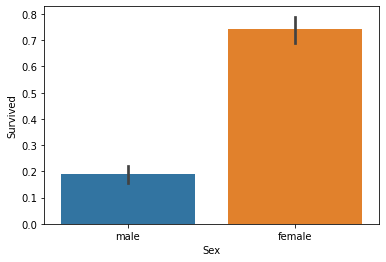

In [19]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

#### ② 객실등급별(Pclass) 성별에 따른 생존확률

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

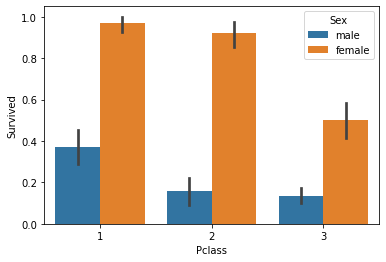

In [20]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

여성일 경우 일, 이등실에 따른 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐을 알 수 있다.  
남성의 경우는 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높다.

#### ③ Age별 성별에 따른 생존확률

Age의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당  
0 ~ 5 세 : Baby  
6 ~ 12 세 : Child  
13 ~ 18 세 : Teenager  
19 ~ 25 세 : Student  
26 ~ 35 세 : Young Adult  
36 ~ 60 세 : Adult  
61세 이상 : Elderly  
-1 이하의 오류 값 : Unknown

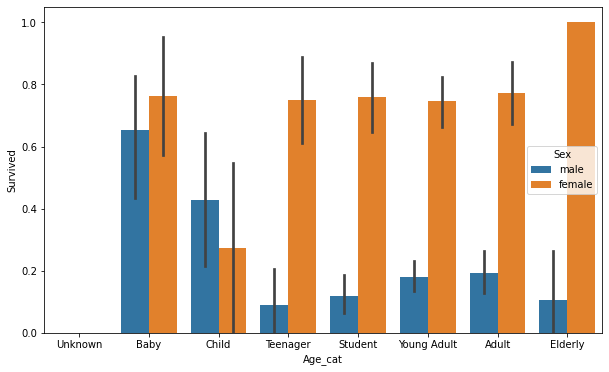

In [21]:
# 입력 age 에 따라 구분 값을 반환하는 함수 설정. DataFrame 의 apply lambda 식에 사용

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

# 막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

여자 Baby의 경우 비교적 생존 확률이 높았다. 아쉽게도 여자 Child의 경우는 다른 연련대에 비해 생존 확률이 낮다.  
그리고 여자 Elderly의 경우는 매우 생존 확률이 높았다.

## 문자열 카테고리 피처 숫자형으로 변환

In [22]:
from sklearn import preprocessing

def encoder_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encoder_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 데이터 전처리 내부 함수로 구성

In [23]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [24]:
# 원본 데이터 가공
# 원본 데이터 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출

titanic_df = pd.read_csv('C:\\Users\\jjku0\\OneDrive\\data\\titanic\\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

## train, test 데이터 나누기

In [25]:
# train_test_split() 으로 별도의 테스트 데이터 추출(20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

## 모델 학습 및 예측

In [26]:
from sklearn.tree import DecisionTreeClassifier       # 의사 결정 트리
from sklearn. ensemble import RandomForestClassifier  # 랜덤 포레스트
from sklearn.linear_model import LogisticRegression   # 로지스틱 회귀
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


C:\Users\jjku0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없다.

## 교차 검증

In [27]:
# KFold 클래스 이용해 교차 검증 수행

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [28]:
# cross_val_score() 이용해 교차 검증 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증{0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증0 정확도: 0.7430
교차 검증1 정확도: 0.7753
교차 검증2 정확도: 0.7921
교차 검증3 정확도: 0.7865
교차 검증4 정확도: 0.8427
평균 정확도: 0.7879


## 최적 하이퍼 파라미터, 예측 성능 측정

In [35]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
            'min_samples_split' : [2,3,5], 'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV 의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
